# Задача оттока клиентов "Бета-банка"

***
### Задача:

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Источник данных: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling


### Описание данных. Признаки:
    
*  RowNumber — индекс строки в данных
*  CustomerId — уникальный идентификатор клиента
*  Surname — фамилия
*  CreditScore — кредитный рейтинг
*  Geography — страна проживания
*  Gender — пол
*  Age — возраст
*  Tenure — сколько лет человек является клиентом банка
*  Balance — баланс на счёте
*  NumOfProducts — количество продуктов банка, используемых клиентом
*  HasCrCard — наличие кредитной карты
*  IsActiveMember — активность клиента
*  EstimatedSalary — предполагаемая зарплата

### Описание данных. Целевой признак:

*  Exited — факт ухода клиента

***

### План работы:

**[Шаг 1.](#section_1)** Загрузка данных, изучение общей информации и предобработка.

**[Шаг 2.](#section_2)** Исследование задачи и моделей.

**[Шаг 3.](#section_3)** Решение задачи - борьба с дисбалансом и выбор итоговой модели.

**[Шаг 4.](#section_4)** Тестирование модели.

**[Шаг 5.](#section_5)** Общий вывод.

<a id='section_1'></a>
### Шаг 1. Загрузка данных, изучение общей информации и предобработка

In [1]:
#Загрузка необходимых библиотек:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier

from matplotlib.ticker import MultipleLocator

#### 1.1 Загрузка данных и изучение общей информации

In [2]:
#Сохраняем данные в датафрейм
data_churn = pd.read_csv('C:/Users/ratus/DATA_SCIENCE/итоговые проекты/5/Churn.csv')

In [3]:
#Общая информация по датафрейму
data_churn.info()

#Несколько строк датафрейма
print (display(data_churn.sample(10)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9810,9811,15705994,Udinese,712,Spain,Male,27,10.0,0.00,1,1,0,94544.88,0
8514,8515,15796071,Loane,657,Spain,Male,29,7.0,83889.03,1,1,0,153059.62,0
5210,5211,15738954,Pisano,551,France,Male,35,7.0,129717.30,2,0,0,86937.20,0
740,741,15637414,Gell,618,France,Female,24,7.0,128736.39,1,0,1,37147.61,0
5110,5111,15646756,Murphy,682,France,Female,33,8.0,74963.50,1,1,1,32770.56,0
5830,5831,15810711,Marcum,684,Germany,Male,37,NaN,138476.41,2,1,1,52367.29,0
1850,1851,15587581,Russo,785,Germany,Female,33,5.0,136624.60,2,1,1,169117.74,0
8800,8801,15647890,Su,691,France,Male,37,9.0,149405.18,1,1,1,146411.60,0
329,330,15624528,L?,664,Germany,Male,26,NaN,116244.14,2,1,1,95145.14,0
4748,4749,15759067,Bromby,537,Germany,Female,37,7.0,158411.95,4,1,1,117690.58,1


None


В полученных данных содержится информация о 10000 клиентах банка. Пропусков в таблице нет, кроме как в признаке `Tenure`.

Необходимо будет привести к нижнему регистру названия столбцов.

Признак `RowNumber`(индекс строки в данных) кажется бесполезным, удалим его.

Надо будет обратить внимание на признак `Tenure` действительно ли там встречаются дробные значения, если нет, то заменим тип столбца на целочисленный. Скорей всего кол-во лет должно быть целым.


Посмотрим данные на наличие аномальностей и выбросов:

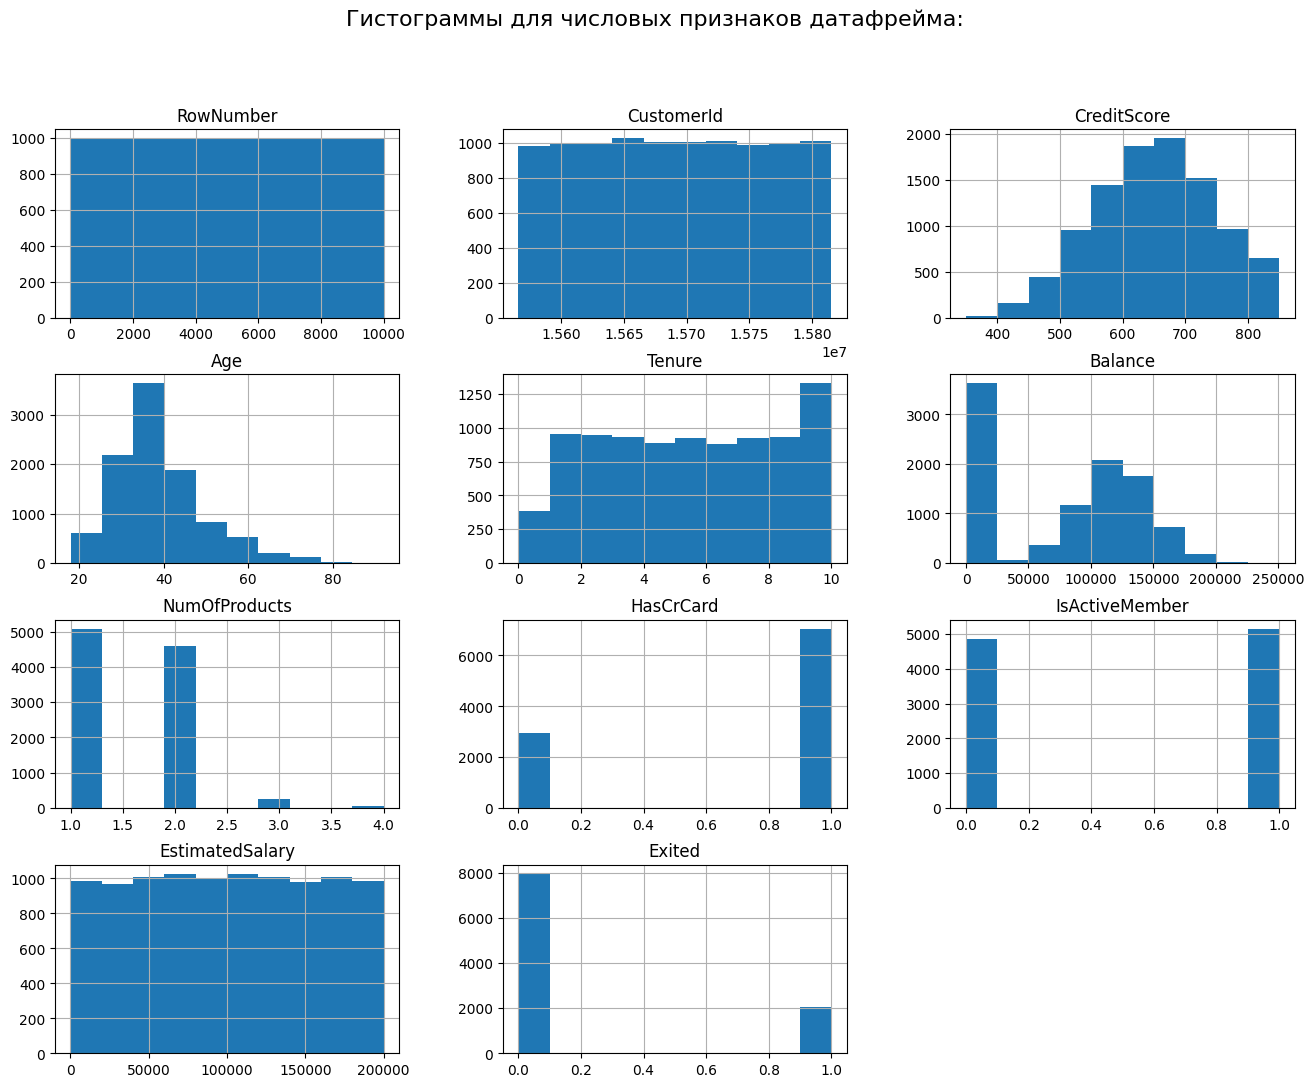

In [4]:
# Общая гистограмма для всех числовых столбцов
data_churn.hist(figsize=(16, 12))
plt.suptitle('Гистограммы для числовых признаков датафрейма:', fontsize=16);

Аномальных данных и выбросов тоже нет.

#### 1.2 Предобработка данных. Работа с названиями. Удаление ненужных признаков

In [5]:
# Приводим данные столбцов к нижнему регистру
data_churn.columns = data_churn.columns.str.lower()

#Проверяем:
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           9091 non-null   float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Удалим признак ` rownumber`:

In [6]:
del data_churn['rownumber']

#Проверяем
data_churn.head()

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


В целом, еще можно удалить и столбцы `customerid` и `surname`, они не дают нам полезного вклада в вопросе ухода клиента из банка. 

In [7]:
del data_churn['customerid']
del data_churn['surname']

#Проверяем
data_churn.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


#### 1.3 Предобработка данных. Проверка на наличие дубликатов

Проверим на наличие дубликатов в датафрейме:

In [8]:
#Ищем дубликаты по всему датафрейму
data_churn.duplicated().sum()

0

В датафрейме дубликатов строк не обнаружено

#### 1.4 Предобработка данных. Работа с пропусками в данных

In [9]:
print ('Процент пропущенных значений в признаке tenure = ',
       data_churn['tenure'].isna().mean()*100)

Процент пропущенных значений в признаке tenure =  9.09


Посмотрим на уникальный значения признака `Tenure`, чтобы решить что делать с пропусками

In [10]:
data_churn['tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

Непонятно как можно заполнить пропуски исходя из других признаков или исходя из уникальных значений и распределения данного признака. Поэтому разобьем данные на категории, чтобы анализировать по категориям, для отсутствующих значений будет отдельная категория.

In [11]:
def categorize_tenure(tenure):
    """
    функция, которая разобьет на категории признак tenure
    """
    try:
        if 0 <= tenure < 2:
            return '0-1'
        elif 2 <= tenure < 4:
            return '2-3'
        elif 4 <= tenure < 6:
            return '4-5'
        elif 6 <= tenure < 8:
            return '6-7'
        elif 8 <= tenure <= 10:
            return '8-10'
        else:
            return 'unknown'
    except:
        pass

In [12]:
# создаем новый столбец tenure_category с категориями
data_churn['tenure_category'] = data_churn['tenure'].apply(categorize_tenure)

# проверяем изменения датафрейма
print(display(data_churn.sample(10)))

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,tenure_category
4555,688,Spain,Female,35,6.0,0.00,1,1,0,25488.43,1,6-7
4016,480,France,Male,40,6.0,148790.61,1,0,1,79329.70,0,6-7
3577,757,France,Male,23,NaN,80673.96,2,1,0,93991.65,0,unknown
3341,718,France,Female,29,3.0,0.00,1,0,1,134462.29,0,2-3
8338,602,Spain,Female,42,1.0,138912.17,1,1,1,139494.75,0,0-1
8348,642,Germany,Female,36,2.0,124495.98,3,1,1,57904.22,1,2-3
8283,664,France,Male,57,1.0,0.00,2,1,1,56562.57,0,0-1
2854,748,France,Male,33,1.0,142645.43,1,0,0,69132.66,0,0-1
1129,669,France,Female,35,7.0,0.00,1,1,1,49108.23,1,6-7
4606,797,France,Female,55,10.0,0.00,4,1,1,49418.87,1,8-10


None


И теперь признак`tenure` тоже удалим, для анализа останется этот признак, разбитый на категории

In [13]:
del data_churn['tenure']

#Проверяем
data_churn.head()

,creditscore,geography,gender,age,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,tenure_category
0,619,France,Female,42,0.00,1,1,1,101348.88,1,2-3
1,608,Spain,Female,41,83807.86,1,0,1,112542.58,0,0-1
2,502,France,Female,42,159660.80,3,1,0,113931.57,1,8-10
3,699,France,Female,39,0.00,2,0,0,93826.63,0,0-1
4,850,Spain,Female,43,125510.82,1,1,1,79084.10,0,2-3


#### 1.5 Предобработка данных. Кодирование категориальных признаков

In [14]:
#Кодируем категориальные признаки датафрейма так,
#чтобы не попасть в дамми-ловушку
data_churn = pd.get_dummies(data_churn, drop_first=True)

#Проверяем
data_churn.head()

,creditscore,age,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male,tenure_category_2-3,tenure_category_4-5,tenure_category_6-7,tenure_category_8-10,tenure_category_unknown
0,619,42,0.00,1,1,1,101348.88,1,0,0,0,1,0,0,0,0
1,608,41,83807.86,1,0,1,112542.58,0,0,1,0,0,0,0,0,0
2,502,42,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0,1,0
3,699,39,0.00,2,0,0,93826.63,0,0,0,0,0,0,0,0,0
4,850,43,125510.82,1,1,1,79084.10,0,0,1,0,1,0,0,0,0


#### Промежуточный вывод

В результате первого шага были загружены данные, изучена общая информация и проведена предобработка:

* В полученных данных содержится информация о 10000 клиентах банка. 
* Пропусков в таблице нет, кроме как в признаке Tenure.
* Названия признаков были приведены к нижнему регистру.
* Признакие `rownumber`, `customerid` и `surname` не дают вклада для решения нашей задачи ухода клиента из банка, упомянутые признаки были удалены.
* Аномальных данных и выбросов в датафрейме не обнаружено.
* Дубликатов в данных не обнаружено.
* Процент пропущенных значений в признаке `tenure` составляет 9.1%. Непонятно как можно заполнить эти пропуски исходя из других признаков или исходя из уникальных значений и распределения данного признака. Поэтому признак был разбит на категории, для отсутствующих значений обозначена отдельная категория unknown.
* Было осуществлено кодирование всех категориальных признаков датафрейма.

<a id='section_2'></a>
### Шаг 2. Исследование задачи и моделей.

#### 2.1 Анализ целевого признака

Посмотрим на частоту значений целевого признака:

Относительные значения частоты классов:
0    0.7963
1    0.2037
Name: exited, dtype: float64 



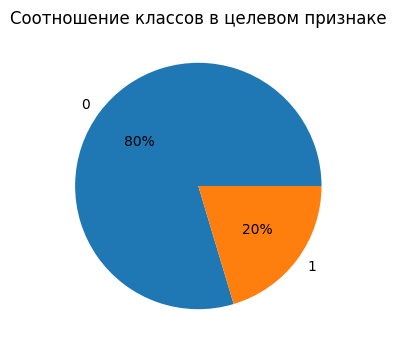

In [15]:
class_frequency = data_churn['exited'].value_counts(normalize=True)
print('Относительные значения частоты классов:')
print (class_frequency, '\n');

#Отобразим на графике
class_frequency.plot(
    kind='pie', 
    figsize = (4,4),
    title = 'Соотношение классов в целевом признаке',
    xlabel = ' ',
    ylabel = ' ',
    autopct='%1.0f%%',
    
);

Видно что в нашем датафрейме ушедших клиентов существенно больше чем тех, которые остались в банке - дисбаланс классов налицо

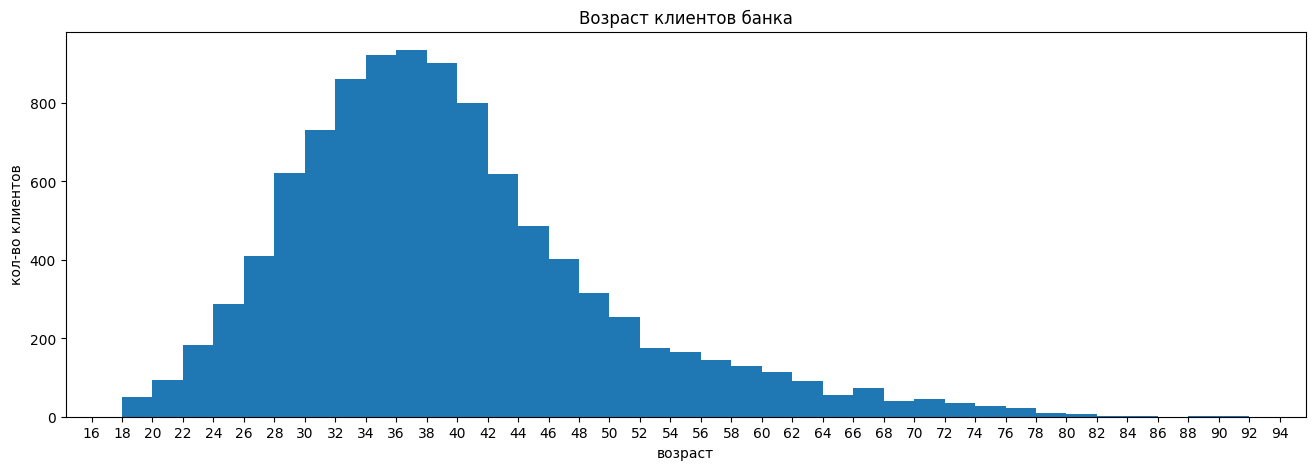

In [16]:
fig,ax = plt.subplots(figsize=(16, 5))
ax.set_title('Возраст клиентов банка')
ax.set_ylabel('кол-во клиентов')
ax.set_xlabel('возраст')

ax.hist(data_churn['age'], bins = 37)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

В представленных данных больше всего людей в возрасте 28-44 лет.

#### 2.2 Изучим модели без учёта дисбаланса

Разделим исходные данные на обучающую (60%), валидационную (20%) и тестовую выборки(20%):

In [17]:
#Выделим из датафрейма общий набор признаков и целевой признак
target = data_churn['exited']
features = data_churn.drop(['exited'] , axis=1)

#Отделим 20% в тестовую выборку features_test, target_test
features_part, features_test, target_part, target_test = train_test_split(
   features, target, test_size = 0.20, random_state=123) 

#Отделим еще 20% в валидационную выборку features_valid, target_valid
features_train, features_valid, target_train, target_valid = train_test_split(
   features_part, target_part, test_size = 0.25, random_state=123) 

#Проверим размер выборок
print (len(features_train), len(features_valid), len(features_test))

6000 2000 2000


Стандартизируем числовые признаки:

In [18]:
#Все числовые признаки
numeric = ['creditscore', 'age', 'balance', 'numofproducts', 'estimatedsalary']

#Создадим объект структуры стандартизации StandardScaler 
# и настроим его на обучающих данных
scaler = StandardScaler()
scaler.fit(features_train[numeric])

#Преобразуем обучающую,валидационную и тестовые выборки
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

#Для игнора предупреждения SettingWithCopy
pd.options.mode.chained_assignment = None

C:\Users\ratus\AppData\Local\Temp\ipykernel_48456\1343822094.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
C:\Users\ratus\anaconda3\envs\practicum1\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\ratus\AppData\Local\Temp\ipykernel_48456\1343822094.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

Начнем с построения модели решающего дерева. Подберем гиперпараметры (например глубину дерева, мин. кол-во примеров для разделения и мин. кол-во объектов в листе), чтобы найти оптимальное решающее дерево:

In [19]:
#Cоздаем словарик, содержащий параметры, которые будем подбирать GridSearch’ем
parametrs_tree = { 'max_depth': range (1,20,2),
            'min_samples_leaf': range (2,20,1),
            'min_samples_split': range (2,10,2)}

#Запускаем обучение
grid = GridSearchCV(
    DecisionTreeClassifier(random_state=123), 
    parametrs_tree, 
    scoring='f1',
    n_jobs=-1);
grid.fit(features_train, target_train);

#Записываем лучший результат:
best_params_tree = grid.best_params_
print (best_params_tree)
print ('Метрика F1 на тренировочной выборке = {:.2f}'.format(grid.best_score_)) 

{'max_depth': 9, 'min_samples_leaf': 10, 'min_samples_split': 2}
Метрика F1 на тренировочной выборке = 0.57


In [20]:
#Создаем модель с указанными параметрами
best_model_tree = DecisionTreeClassifier(
    random_state=123,
    max_depth = best_params_tree['max_depth'],
    min_samples_leaf= best_params_tree['min_samples_leaf'], 
    min_samples_split= best_params_tree['min_samples_split'])

#Обучаем
best_model_tree.fit(features_train, target_train)  

#Делаем предсказание
predicted_valid = best_model_tree.predict(features_valid)

#Смотрим качество модели на валидационной выборке
best_result_tree = f1_score(target_valid, predicted_valid)
print('Метрика F1 на валидационной выборке {:.2f}'.format(best_result_tree))
print('Матрица ошибок','\n', confusion_matrix(target_valid,predicted_valid))

Метрика F1 на валидационной выборке 0.53
Матрица ошибок 
 [[1516   64]
 [ 244  176]]


F1 на решающем дереве без учета дисбаланса не радует. Видно как часто модель не распознает единички, думая что это 0, намного чаще чем правильное распознавание, когда единичку распознал как единичку.

Найдем кривую ROC и посмотрим метрику AUC-ROC:

In [21]:
def roc_and_aucroc (model, features_valid, target_valid):
    """
    Функция для построения ROC кривой 
    и вычисления площади под этой кривой (AUC-ROC)
    на вход принимает модель, признаки валидационной выборки
    и целевой признак валидационной выборки
    """

    #Вычислим вероятность классов для валидационной выборки
    probabilities_valid = model.predict_proba(features_valid)
    #Значения вероятностей класс 1 сохраним отдельно
    probabilities_one_valid = probabilities_valid[:, 1]

    #Получим ROC-кривую
    fpr_tree, tpr_tree, thresholds_tree = roc_curve(target_valid, probabilities_one_valid) 

    #Отрисуем график:
    plt.figure()
    # ROC-кривая нашей модели
    plt.plot(fpr_tree, tpr_tree)

    # ROC-кривая случайной модели
    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel("Доля ложных срабатываний")
    plt.ylabel("Доля верно предсказанных объектов")
    plt.title("ROC-кривая")

    plt.show()

    #Посчитаем площадь под ROC-кривой
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print('Площадь под ROC-кривой {:.2f}'.format(auc_roc))
    

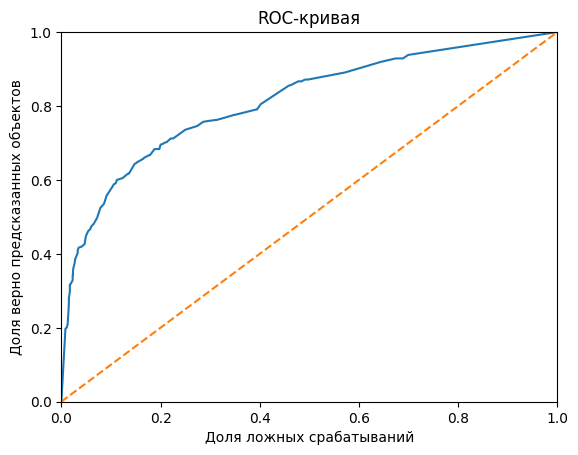

Площадь под ROC-кривой 0.81


In [22]:
roc_and_aucroc(best_model_tree, features_valid, target_valid)

Но, попробуем еще случайный лес без учета дисбаланса

In [23]:
#Cоздаем словарик, содержащий параметры, которые будем подбирать GridSearch’ем
parametrs_forest = { 'n_estimators': range (1, 130, 10),
              'max_depth': range (1,20, 4)}

#Запускаем обучение
grid = GridSearchCV(
    RandomForestClassifier(random_state=123), 
    parametrs_forest,
    scoring='f1',
    n_jobs=-1
);
grid.fit(features_train, target_train);

#Записываем лучший результат:
best_params_forest = grid.best_params_
print (best_params_forest)
print ('Метрика F1 на тренировочной выборке = {:.2f}'.format(grid.best_score_)) 

{'max_depth': 13, 'n_estimators': 41}
Метрика F1 на тренировочной выборке = 0.56


In [24]:
#Создаем модель с указанными параметрами
best_model_forest = RandomForestClassifier(
    random_state=123, 
    n_estimators=best_params_forest['n_estimators'], 
    max_depth= best_params_forest['max_depth'] ) 
#Обучаем
best_model_forest.fit(features_train, target_train)

#Делаем предсказание
predicted_valid = best_model_forest.predict(features_valid)

#Смотрим качество модели на валидационной выборке
best_result_forest = f1_score(target_valid, predicted_valid)

print('Метрика F1 на валидационной выборке {:.2f}'.format(best_result_forest))
print('Матрица ошибок','\n', confusion_matrix(target_valid,predicted_valid))

Метрика F1 на валидационной выборке 0.55
Матрица ошибок 
 [[1543   37]
 [ 245  175]]


F1 для случайного леса уже лучше. Но распознавание истинных единичек пока не особо продвинулось.

Найдем кривую ROC и посмотрим метрику AUC-ROC: 

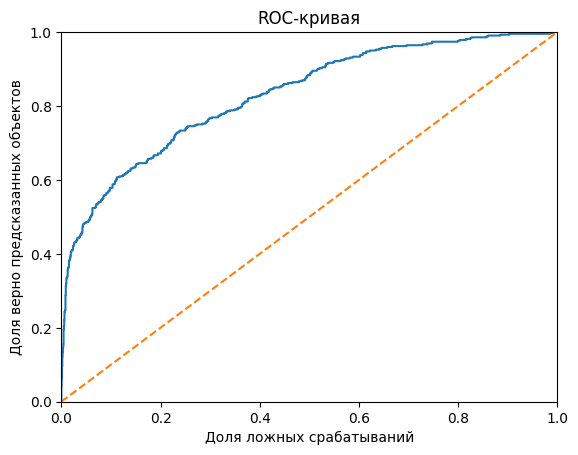

Площадь под ROC-кривой 0.83


In [25]:
roc_and_aucroc(best_model_forest, features_valid, target_valid)

Попробуем модель логистической регрессии:

In [26]:
#Cоздаем словарик, содержащий параметры, которые будем подбирать GridSearch’ем
parametrs_log = { 'solver': ['newton-cg','lbfgs', 'liblinear', 'saga']}

#Запускаем обучение
grid = GridSearchCV(
    LogisticRegression(random_state=123), 
    parametrs_log,
    scoring='f1',
    n_jobs=-1
);
grid.fit(features_train, target_train);

#Записываем лучший результат:
best_params_log = grid.best_params_
print (best_params_log)
print ('Метрика F1 на тренировочной выборке = {:.2f}'.format(grid.best_score_)) 

{'solver': 'newton-cg'}
Метрика F1 на тренировочной выборке = 0.30


In [27]:
model_log = LogisticRegression(
    random_state=123,
    solver= best_params_log['solver']) 
#Обучаем
model_log.fit(features_train, target_train)

#Делаем предсказание
predicted_valid = model_log.predict(features_valid)

#Смотрим качество модели на валидационной выборке
best_result_log = f1_score(target_valid, predicted_valid)

print('Метрика F1 на валидационной выборке {:.2f}'.format(best_result_log))
print('Матрица ошибок','\n', confusion_matrix(target_valid,predicted_valid))

Метрика F1 на валидационной выборке 0.27
Матрица ошибок 
 [[1526   54]
 [ 345   75]]


 Для логистической регресси метрика F1 очень плоха, не идет в сравнение с предыдущими моделями.
 
 Найдем кривую ROC и посмотрим метрику AUC-ROC:

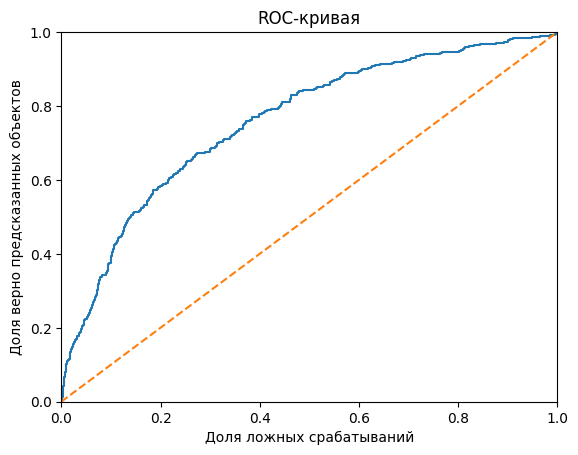

Площадь под ROC-кривой 0.76


In [28]:
roc_and_aucroc(model_log, features_valid, target_valid)

#### Промежуточный вывод

В целевом признаке присутствует существенный дисбаланс классов.

Построение моделей без учета данного дисбаланса имеют низкое качество:

* Мера F1 для дерева решений на валидационной выборке = 0.53 (на тренировочной выборке = 0.57)
    
    Параметры модели ('max_depth': 9, 'min_samples_leaf': 10, 'min_samples_split': 2)
    
    Матрица ошибок:
     |     |   |
    |:----:|:----:|
    |1516|64|
    |244|176|

    Площадь под ROC-кривой 0.81
    
     F1 на решающем дереве без учета дисбаланса не радует. Видно как часто модель не распознает единички, думая что это 0, намного чаще чем правильное распознавание, когда единичку распознал как единичку.
 
* Мера F1 для случайного леса на валидационной выборке = 0.55 (на тренировочной выборке = 0.56)
    
    Параметры модели ('max_depth': 13, 'n_estimators': 41)
    
    Матрица ошибок:
     |     |   |
    |:----:|:----:|
    |1543|37|
    |245|175|
    
     F1 для случайного леса уже лучше. Но распознавание истинных единичек пока не особо продвинулось.
     
     Площадь под ROC-кривой 0.83
 
* Мера F1 для логистической регрессии на валидационной выборке = 0.27 (на тренировочной выборке = 0.30)

    Параметры модели ('solver': 'newton-cg'

    Матрица ошибок:
     |     |   |
    |:----:|:----:|
    |1525|55|
    |345|75|
    
     Для логистической регрессии метрика F1 очень плоха, не идет в сравнение с предыдущими моделями.

    Площадь под ROC-кривой 0.76

<a id='section_3'></a>
### Шаг 3. Решение задачи - борьба с дисбалансом и выбор итоговой модели.

#### Шаг 3.1 Борьба с дисбалансом. Взвешивание классов

Придадим объектам редкого класса больший вес, и посмотрим на результаты на наших моделях

In [29]:
#Cоздаем словарик, содержащий параметры, которые будем подбирать GridSearch’ем
parametrs_tree = { 'max_depth': range (1,20,2),
            'min_samples_leaf': range (2,20,2),
            'min_samples_split': range (2,10,2)}

#Запускаем обучение
grid = GridSearchCV(
    DecisionTreeClassifier(random_state=123,class_weight='balanced'), 
    parametrs_tree, 
    scoring='f1',
    n_jobs=-1);
grid.fit(features_train, target_train);

#Записываем лучший результат:
best_params_tree  = grid.best_params_
print (best_params_tree)
print ('Метрика F1 на тренировочной выборке = {:.2f}'.format(grid.best_score_)) 

{'max_depth': 7, 'min_samples_leaf': 16, 'min_samples_split': 2}
Метрика F1 на тренировочной выборке = 0.57


In [30]:
#Создаем модель с указанными параметрами
best_model_tree_weight = DecisionTreeClassifier(
    random_state=123, 
    class_weight='balanced',
    max_depth = best_params_tree['max_depth'],
    min_samples_leaf= best_params_tree['min_samples_leaf'], 
    min_samples_split= best_params_tree['min_samples_split'])

#Обучаем
best_model_tree_weight.fit(features_train, target_train)  

#Делаем предсказание
predicted_valid = best_model_tree_weight.predict(features_valid)

#Смотрим качество модели на валидационной выборке
best_result_tree_weight = f1_score(target_valid, predicted_valid)

print('Метрика F1 на валидационной выборке {:.2f}'.format(best_result_tree_weight))
print('Матрица ошибок','\n', confusion_matrix(target_valid,predicted_valid))

Метрика F1 на валидационной выборке 0.55
Матрица ошибок 
 [[1215  365]
 [ 119  301]]


Взвешивание улучшило метрику F1, и заметно улучшило распознавание истинных единичек. Теперь истинных единичек модель находит больше чем ложных

Найдем кривую ROC и посмотрим метрику AUC-ROC:

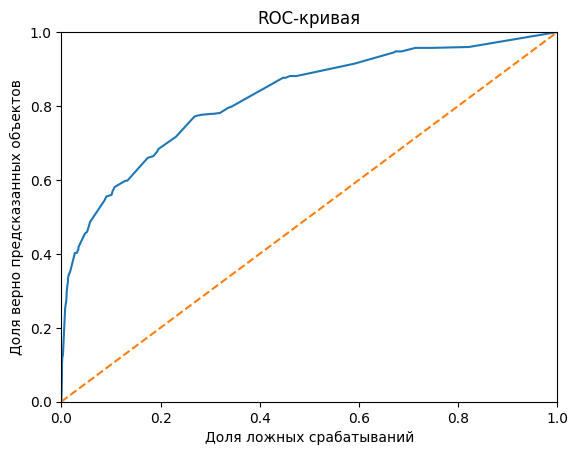

Площадь под ROC-кривой 0.82


In [31]:
roc_and_aucroc(best_model_tree_weight, features_valid, target_valid)

 Посмотрим что будет для случайного леса

In [32]:
#Cоздаем словарик, содержащий параметры, которые будем подбирать GridSearch’ем
parametrs_forest = { 'n_estimators': range (1, 130, 10),
              'max_depth': range (1,20,4)}

#Запускаем обучение
grid = GridSearchCV(
    RandomForestClassifier(random_state=123, class_weight='balanced'), 
    parametrs_forest,
    scoring='f1',
    n_jobs=-1
);
grid.fit(features_train, target_train);

#Записываем лучший результат:
best_params_forest = grid.best_params_
print (best_params_forest)
print ('Метрика F1 на тренировочной выборке = {:.2f}'.format(grid.best_score_)) 

{'max_depth': 9, 'n_estimators': 121}
Метрика F1 на тренировочной выборке = 0.61


In [33]:
#Создаем модель с указанными параметрами
best_model_forest_weight = RandomForestClassifier(
    random_state=123, 
    class_weight='balanced',
    n_estimators=best_params_forest['n_estimators'], 
    max_depth= best_params_forest['max_depth'] ) 
#Обучаем
best_model_forest_weight.fit(features_train, target_train)

#Делаем предсказание
predicted_valid = best_model_forest_weight.predict(features_valid)

#Смотрим качество модели на валидационной выборке
best_result_forest_weight = f1_score(target_valid, predicted_valid)

print('Метрика F1 на валидационной выборке {:.2f}'.format(best_result_forest_weight))
print('Матрица ошибок','\n', confusion_matrix(target_valid,predicted_valid))

Метрика F1 на валидационной выборке 0.59
Матрица ошибок 
 [[1390  190]
 [ 163  257]]


Взвешивание классов для случайного леса улучшило качество (мы добрались до приемлемой метрики = 0.59), и намного улучшилось обнаружение истинных единичек.

Найдем кривую ROC и посмотрим метрику AUC-ROC:

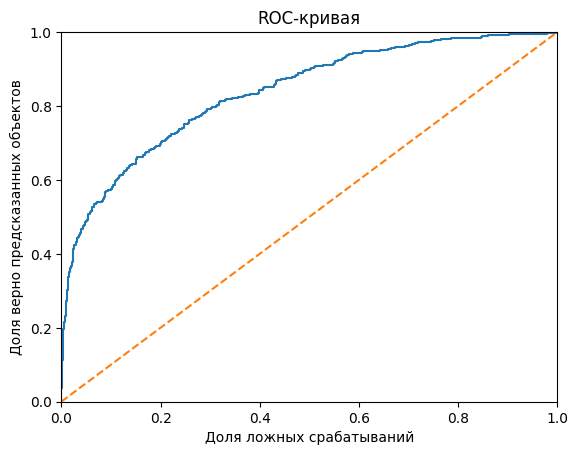

Площадь под ROC-кривой 0.84


In [34]:
roc_and_aucroc(best_model_forest_weight, features_valid, target_valid)

И метрика F1 и метрика AUC-ROC у случайного леса лучше чем у дерева решений.

Посмотрим модель логистической регрессии

In [35]:
#Cоздаем словарик, содержащий параметры, которые будем подбирать GridSearch’ем
parametrs_log = { 'solver': ['newton-cg','lbfgs', 'liblinear', 'saga']}

#Запускаем обучение
grid = GridSearchCV(
    LogisticRegression(random_state=123,class_weight='balanced'), 
    parametrs_log,
    scoring='f1',
    n_jobs=-1
);
grid.fit(features_train, target_train);

#Записываем лучший результат:
best_params_log = grid.best_params_
print (best_params_log)
print ('Метрика F1 на тренировочной выборке = {:.2f}'.format(grid.best_score_)) 

{'solver': 'liblinear'}
Метрика F1 на тренировочной выборке = 0.48


In [36]:
best_model_log__weight = LogisticRegression(
    random_state=123,
    solver= best_params_log['solver'],
    class_weight='balanced') 
#Обучаем
best_model_log__weight.fit(features_train, target_train)

#Делаем предсказание
predicted_valid = best_model_log__weight.predict(features_valid)

#Смотрим качество модели на валидационной выборке
best_result_log_weight = f1_score(target_valid, predicted_valid)

print('Метрика F1 на валидационной выборке {:.2f}'.format(best_result_log_weight))
print('Матрица ошибок','\n', confusion_matrix(target_valid,predicted_valid))

Метрика F1 на валидационной выборке 0.50
Матрица ошибок 
 [[1119  461]
 [ 130  290]]


Для логистической регрессии взвешивание дало существенное увеличение качества, но в целом качество всеравно остается ниже чем у решающего дерева или тем более случайного леса.

Найдем кривую ROC и посмотрим метрику AUC-ROC:

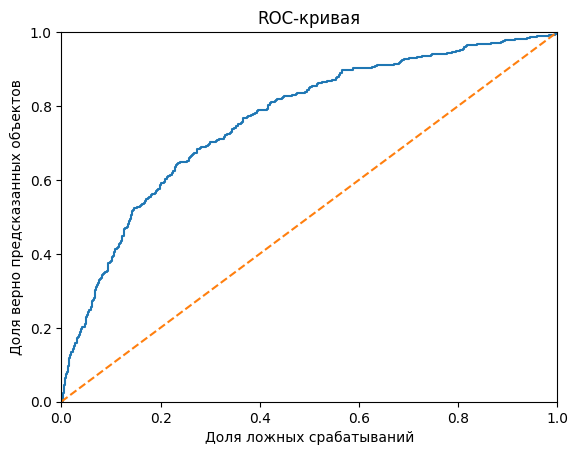

Площадь под ROC-кривой 0.76


In [37]:
roc_and_aucroc(best_model_log__weight, features_valid, target_valid)

#### Промежуточный вывод

Построение моделей c использованием взвешивания для устранения дисбаланса имеют следующее качество:
* Мера F1 для дерева решений на валидационной выборке = 0.55 (на тренировочной выборке = 0.57) 
    
    Параметры модели ('max_depth': 7, 'min_samples_leaf': 16, 'min_samples_split': 2)
    
    Матрица ошибок:
    |     |   |
    |:----:|:----:|
    |1215|365|
    |119|301|
 
    Площадь под ROC-кривой 0.82

    Взвешивание улучшило метрику F1, и заметно улучшило распознавание истинных единичек. Теперь истинных единичек модель находит больше чем ложных
    
* Мера F1 для случайного леса на валидационной выборке = 0.59 (на тренировочной выборке = 0.61)

    Параметры модели ('max_depth': 9, 'n_estimators': 121)

    Матрица ошибок:
    |     |   |
    |:----:|:----:|
    |1390|190|
    |167|253|
    
    Площадь под ROC-кривой 0.84

    Взвешивание классов для случайного леса улучшило качество (как метрику F1 так и метрику AUC_ROC) и намного улучшилось обнаружение истинных единичек.

* Мера F1 для логистической регрессии на валидационной выборке = 0.50 (на тренировочной выборке = 0.48)
    
    Параметры модели ('solver': 'newton-cg')
    
    Матрица ошибок:
     |     |   |
    |:----:|:----:|
    |1119|461|
    |130|290|
    
     Площадь под ROC-кривой 0.76. 
     
     Для логистической регрессии взвешивание дало существенное увеличение качества, но в целом качество всеравно остается ниже чем у решающего дерева или тем более случайного леса.
     
     **Взвешивание классов позволило улучшить качество всех рассматриваемых моделей. Лучшие результаты получены для модели случайного леса.**
 

#### Шаг 3.2 Борьба с дисбалансом. Увеличение выборки

Преобразуем нашу выборку следующим образом:

- разделим выборку на объекты класса 0 и класса 1
- скопируем несколько раз объекты класса 1, создавая увеличенную обущающую выборку
- перемешаем данные

In [38]:
def upsample(features, target, repeat):
    """
    Функция для борьбы с дисбалансом, путем увеличения выборки
    На вход принимает набор признаков, целевой признак
    и количество повторений
    """
    #запишем признаки объектов с классом 0 а потом с 1
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    
    #Запишем целевые признаки, у которых 0 и у которых 1
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    return (
        shuffle(features_upsampled, random_state=12345),
        shuffle(target_upsampled, random_state=12345))

In [39]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

#Проверяем новый размеры
print(features_upsampled.shape)
print(target_upsampled.shape)
#Проверяем баланс классов
print(target_upsampled.value_counts(normalize = 1))

(9609, 15)
(9609,)
1    0.500781
0    0.499219
Name: exited, dtype: float64


Построим теперь модель дерева решений, и проверим какое получится качество при работе с увеличенной выборкой:

In [40]:
#Создаем модель
model_tree_upsampl = DecisionTreeClassifier(
    random_state= 123, 
    max_depth = 6,
    min_samples_leaf= 2, 
    min_samples_split= 2)

#Обучаем
model_tree_upsampl.fit(features_upsampled, target_upsampled)  

#Делаем предсказание
predicted_valid = model_tree_upsampl.predict(features_valid)

#Смотрим качество модели на валидационной выборке
result_tree_upsampl = f1_score(target_valid, predicted_valid)

print('Метрика F1 на валидационной выборке {:.2f}'.format(result_tree_upsampl))
print('Матрица ошибок','\n', confusion_matrix(target_valid,predicted_valid))

Метрика F1 на валидационной выборке 0.55
Матрица ошибок 
 [[1134  446]
 [  93  327]]


Найдем кривую ROC и посмотрим метрику AUC-ROC:

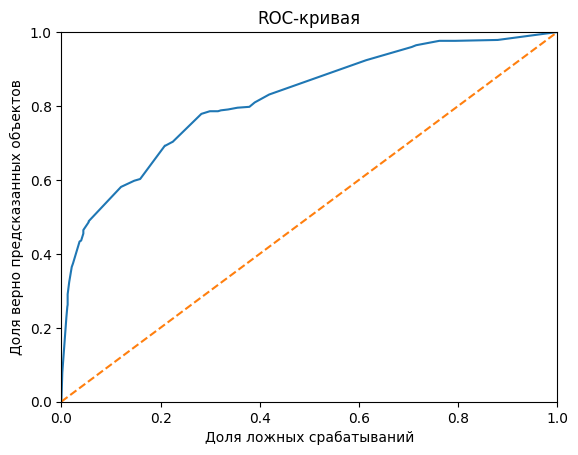

Площадь под ROC-кривой 0.82


In [41]:
roc_and_aucroc(model_tree_upsampl, features_valid, target_valid)

Для модели решающего дерева увеличение выборки дает самый хороший результат, но метрика пока еще маловата для нас

Посмотрим как увеличение выборки покажет себя на модели случайного леса:

In [42]:
#Создаем модель
model_forest_upsampl = RandomForestClassifier(
    random_state=123, 
    n_estimators=90, 
    max_depth= 10 ) 
#Обучаем
model_forest_upsampl.fit(features_upsampled, target_upsampled)

#Делаем предсказание
predicted_valid = model_forest_upsampl.predict(features_valid)

#Смотрим качество модели на валидационной выборке
result_forest_upsampl = f1_score(target_valid, predicted_valid)

print('Метрика F1 на валидационной выборке {:.2f}'.format(result_forest_upsampl))
print('Матрица ошибок','\n', confusion_matrix(target_valid,predicted_valid))

Метрика F1 на валидационной выборке 0.59
Матрица ошибок 
 [[1362  218]
 [ 155  265]]


Посмотрим на ROC-кривую и метрику AUC-ROC

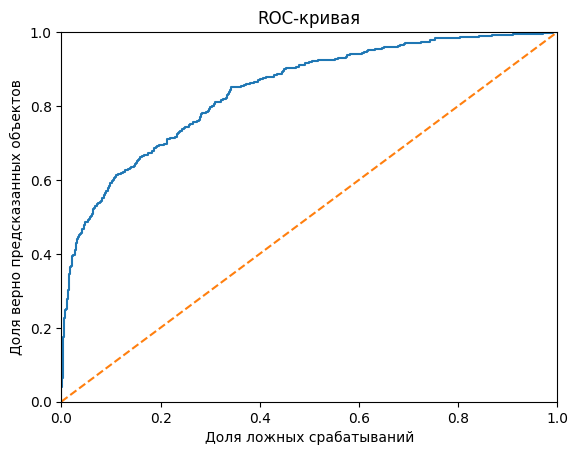

Площадь под ROC-кривой 0.84


In [43]:
roc_and_aucroc(model_forest_upsampl, features_valid, target_valid)

Метрика качества F1 и метрика AUC_ROC такая же как и при взвешивании, зато распознавание истинных единичек стало чуток лучше. На данный момент это самый хороший результат.

Посмотрим на модель логистической регрессии:

In [44]:
model_log_upsampl = LogisticRegression(
    random_state=123,
    solver= 'newton-cg') 

#Обучаем
model_log_upsampl.fit(features_upsampled, target_upsampled)

#Делаем предсказание
predicted_valid = model_log_upsampl.predict(features_valid)

#Смотрим качество модели на валидационной выборке
result_log_upsampl = f1_score(target_valid, predicted_valid)

print('Метрика F1 на валидационной выборке {:.2f}'.format(result_log_upsampl))
print('Матрица ошибок','\n', confusion_matrix(target_valid, predicted_valid))

Метрика F1 на валидационной выборке 0.49
Матрица ошибок 
 [[1117  463]
 [ 130  290]]


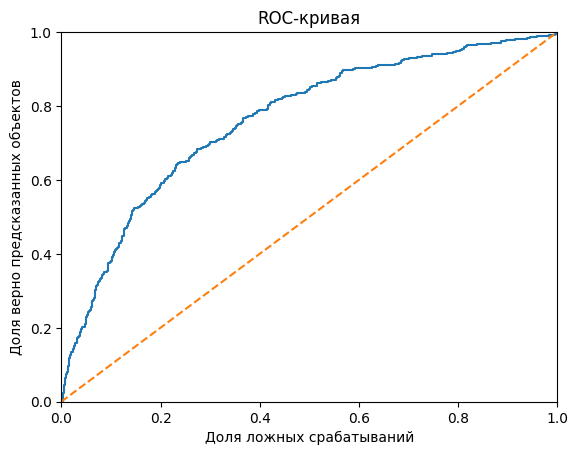

Площадь под ROC-кривой 0.76


In [45]:
roc_and_aucroc(model_log_upsampl, features_valid, target_valid)

Качество модели улучшилось совсем немного в сравнении с использованием взвешивания.

#### Промежуточный вывод

Построение моделей c использованием увеличения выборки для устранения дисбаланса имеют следующее качество:

* Мера F1 для дерева решений на валидационной выборке = 0.55

    Параметры модели ('max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2)
    
    Матрица ошибок:
     |     |   |
    |:----:|:----:|
    |1134|446|
    |93|327|
 
    Площадь под ROC-кривой 0.82
    
    Для модели решающего дерева увеличение выборки дает самый хороший результат, но метрика пока еще маловата для нас 
    
* Мера F1 для случайного леса на валидационной выборке = 0.59

    Параметры модели ('max_depth': 10, 'n_estimators': 90)
    
    Матрица ошибок:
     |     |   |
    |:----:|:----:|
    |1362|218|
    |155|265|

    Площадь под ROC-кривой 0.84

    Метрика качества F1 и метрика AUC_ROC такая же как и при взвешивании, зато распознавание истинных единичек стало чуток лучше. На данный момент это самый хороший результат.

* Мера F1 для логистической регрессии на валидационной выборке = 0.49
    
    Параметры модели ('solver': 'newton-cg')
    
    Матрица ошибок:
     |     |   |
    |:----:|:----:|
    |1117|463|
    |130|290|
 
 Площадь под ROC-кривой 0.76
 
Качество модели немного ухудшилось в сравнении с использованием взвешивания.
 
 
**Из вышерассмотренных, лучше всего себя показала модель случайного леса с увеличением выборки для борьбы с дисбалансом. Ее и будем тестировать.**

<a id='section_4'></a>
### Шаг 4. Тестирование модели

In [46]:
#Делаем предсказание
predicted_test = model_forest_upsampl.predict(features_test)

#Смотрим качество модели на тестовой выборке
result = f1_score(target_test, predicted_test)

print('Метрика F1 на тестовой выборке {:.2f}'.format(result))

Метрика F1 на тестовой выборке 0.63


Кривая ROC и метрика AUC-ROC на тестовой выборке:

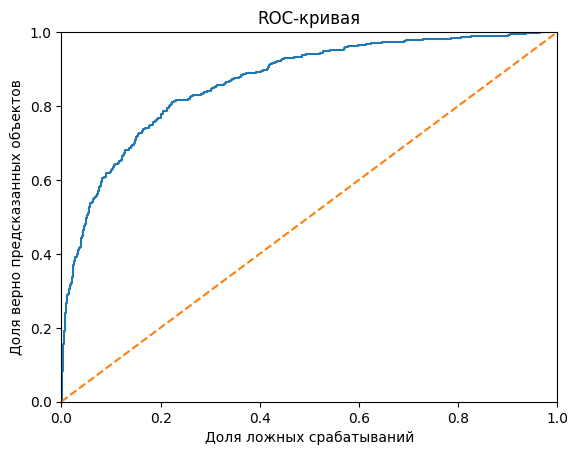

Площадь под ROC-кривой 0.87


In [47]:
roc_and_aucroc(model_forest_upsampl, features_test, target_test)

Получено приемлемое для нас значение метрики F1 на тестовой выборке - успех! Будем использовать данную модель для прогноза.

Посмотрим какие факторы важны при моделировании:

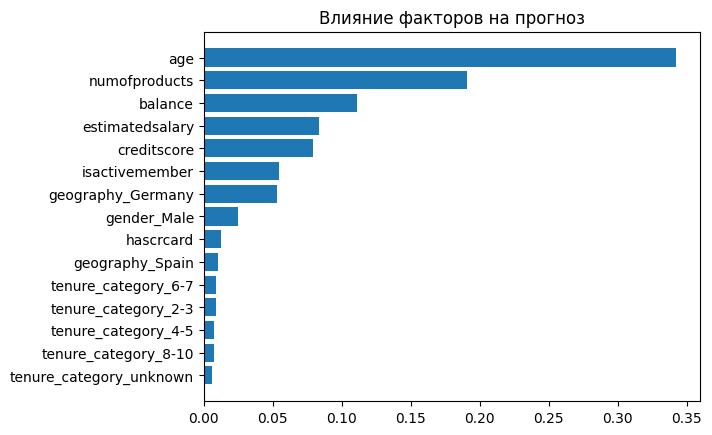

In [48]:
#Получим массив значений важности каждого признака
importances = model_forest_upsampl.feature_importances_

#получим список индексов отсортированных элементов массива
indices = np.argsort(importances)

#Отобразмим на графике в порядке убывания
fig, ax = plt.subplots()
ax.set_title('Влияние факторов на прогноз')
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
ax.set_yticklabels(np.array(features_train.columns)[indices]);

Больше всего на прогноз ухода клиента из банка влияет возраст клиента, количество используемых продуктов и баланс.

Также можно заметить, что мы могли просто удалить те пропущенные данные в признаке `tenure`, так как они, и в целом весь тот столбец имеют очень малое влияние на прогноз.

### Общий вывод

#### Цели исследования:

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

***
#### Полученные данные были изучены и прошли следующую предобработку:

* В полученных данных содержится информация о 10000 клиентах банка. 
* Названия признаков были приведены к нижнему регистру.
* Пропусков в таблице нет, кроме как в признаке `Tenure` (9.1%). Признак был разбит на категории, для отсутствующих значений обозначена отдельная категория unknown.
* Признакие `rownumber`, `customerid` и `surname` не дают вклада для решения нашей задачи ухода клиента из банка, упомянутые признаки были удалены.
* Аномальных данных и выбросов в датафрейме не обнаружено.
* Дубликатов в данных не обнаружено.
* Было осуществлено прямое кодирование всех категориальных признаков датафрейма.

#### Исследование задачи и моделей:

* Видно что в нашем датафрейме ушедших клиентов существенно больше чем тех, которые остались в банке - дисбаланс классов налицо:

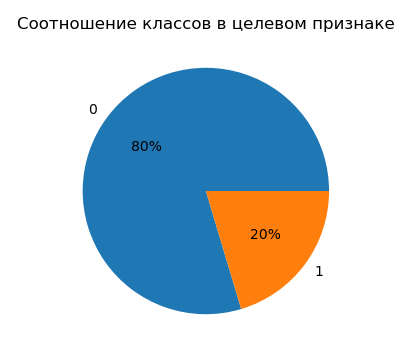

* Прямой корреляции целевого признака с другими не обнаружено (самое наибольшее значение корреляции из встречаемых - 0.29 для признака возраст).
* В представленных данных больше всего людей в возрасте 28-44 лет.
* Исходные данные были разделены на обучающую выборку (60%), валидационную (20%) и тестовую (20%).
* Числовые признаки были стандартизированы.

* Перед нами задача классификации. Были выбраны три модели для анализа - Дерево решений, Случайный лес и Логистическая регрессия.

* Был проведен анализ моделей при нескольких раскладах: 
    1) без учета дисбаланса классов;
    2) в борьбе с дисбалансом путем взвешивания классов; 
    3) в борьбе с дисбалансом путем увеличения выборки (частота класса 1 была увеличена в 4 раза). 
    
    
**Результаты анализа для модели Дерева Решений:**

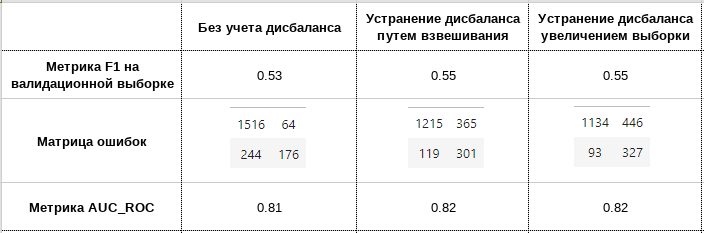


**Результаты анализа для модели Случайного леса:**

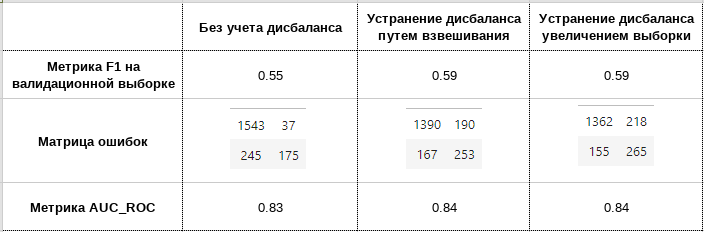


**Результаты анализа для модели Логистической регрессии:**

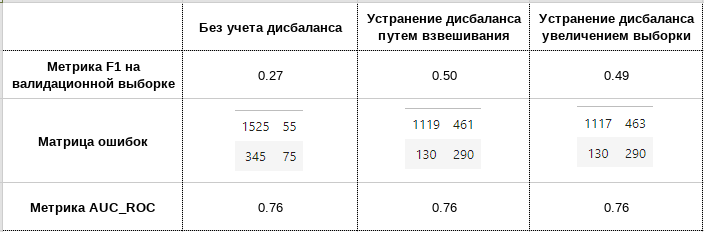


Построение моделей без учета дисбаланса имеют очень низкое качество.

Взвешивание классов позволило улучшить качество всех рассматриваемых моделей. Увеличение выборки давало меньший эффект либо не давало вовсе, а также появлялся эффект переобучения.

Из вышерассмотренных, лучше всего себя показала модель случайного леса с использованием взвешивания для борьбы с дисбалансом. 

#### Итоговая модель и тестирование:

По итогу решения задачи, для прогноза будем использовать модель случайного леса с использованием взвешивания для борьбы с дисбалансом.

Параметры модели: количество деревьев = 90, глубина = 10.

При тестировании метрика F1 составила 0.63, а метрика AUC_ROC составила 0.87.

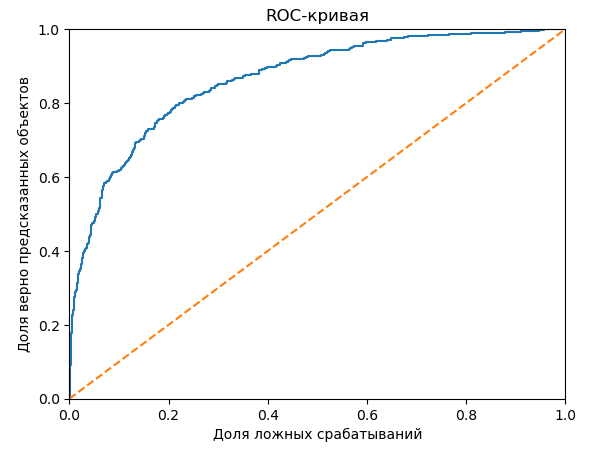

Важность факторов при прогнозировании ухода клиента из банка:

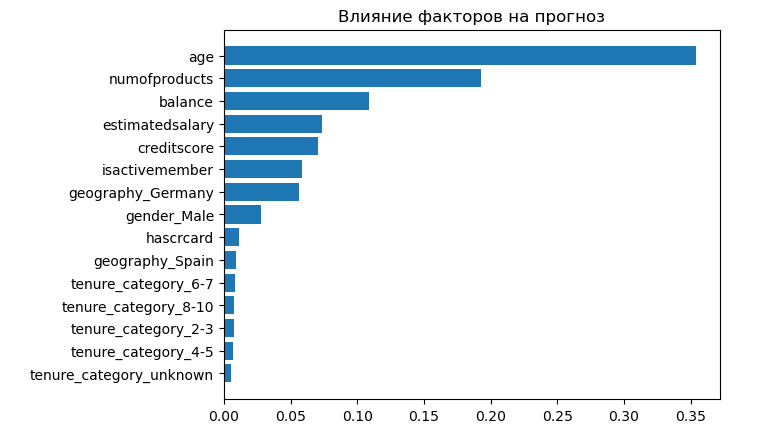

Больше всего на прогноз ухода клиента из банка влияет возраст клиента, количество используемых продуктов и баланс.

Также можно заметить, что мы могли просто удалить те пропущенные данные в признаке tenure, так как они, и в целом весь тот столбец имеют очень малое влияние на прогноз.